In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as curve_fit
from scipy.optimize import minimize as minimize
from uncertainties import ufloat
from uncertainties import unumpy
from uncertainties.umath import *
from uncertainties.unumpy import nominal_values as nv
from uncertainties.unumpy import std_devs as sd
from lmfit import Model
from lmfit.models import GaussianModel
from functools import partial
from copy import deepcopy
%matplotlib notebook

In [3]:
ds = [0.0,0.3,0.5,1.0]
files = [f"6_angle_{i:.1f}mm.csv" for i in ds]

In [4]:
def read_file(name):
    data = pd.read_csv(name)
    N = unumpy.uarray(data.N,np.sqrt(data.N))
    t = unumpy.uarray(data.t,np.ones(data.t.shape[0]))
    theta = unumpy.uarray(data.angle,np.ones(data.angle.shape[0]))
    I = N/t
    a = lambda : None
    a.I = I
    a.theta = theta
    return a

In [7]:
data = [read_file(i) for i in files]

In [11]:
data[0].theta.shape

(8,)

In [ ]:
d = data[0]
for i in range(d.theta.shape[0])
    angle = data.theta[i]
    for j in range(data.shape[0]):
        cos(x)**2*

<IPython.core.display.Javascript object>


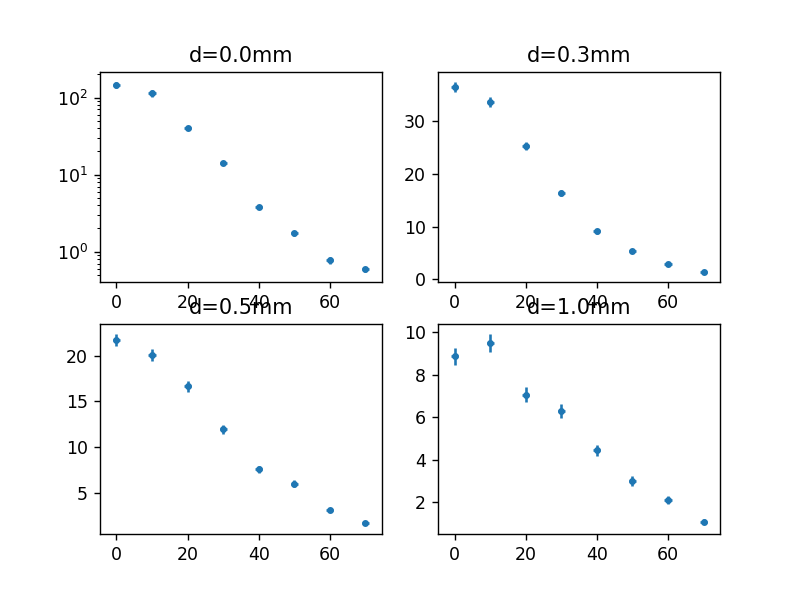

In [5]:
fig, axes = plt.subplots(2,2)
for i,d in enumerate(data):
    ax = axes[i//2,i%2]
    ax.errorbar(nv(d.theta),nv(d.I),yerr=sd(d.I),xerr=sd(d.theta),fmt='.')
    ax.set_title(f"d={ds[i]:.1f}mm")
axes[0,0].set_yscale('log')

I expect that plot 0 should be a gaussian, .3 also. 1.0mm should be the cos^2

<IPython.core.display.Javascript object>


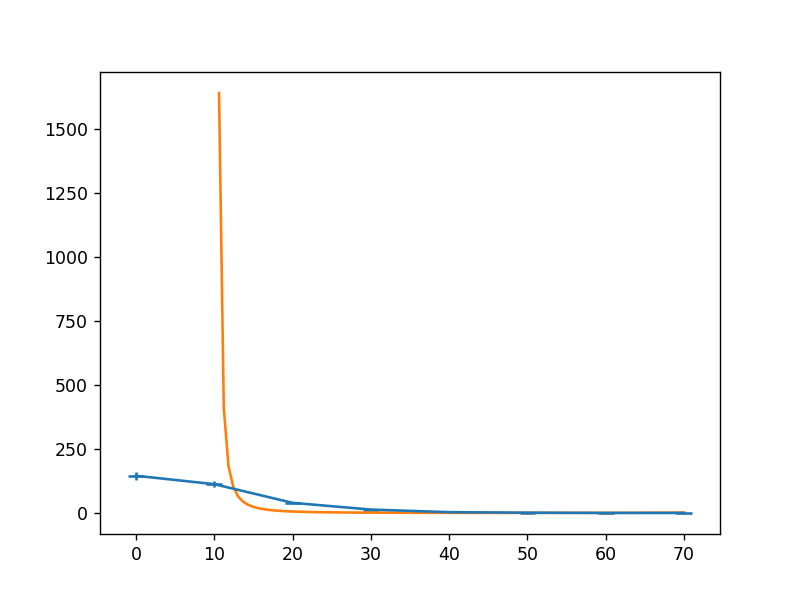

<ipython-input-6-b6b2822d490d>:3: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(np.linspace(10,70,100),1/np.sin(np.linspace(0,70,100)/180*2*np.pi)**2)


In [6]:
fig,ax = plt.subplots()#2,figsize=(12,6))
ax.errorbar(nv(data[0].theta),nv(data[0].I),xerr=sd(data[0].theta),yerr=sd(data[0].I))
ax.plot(np.linspace(10,70,100),1/np.sin(np.linspace(0,70,100)/180*2*np.pi)**2)
# ax[1].errorbar(nv(data[0].I))

<IPython.core.display.Javascript object>


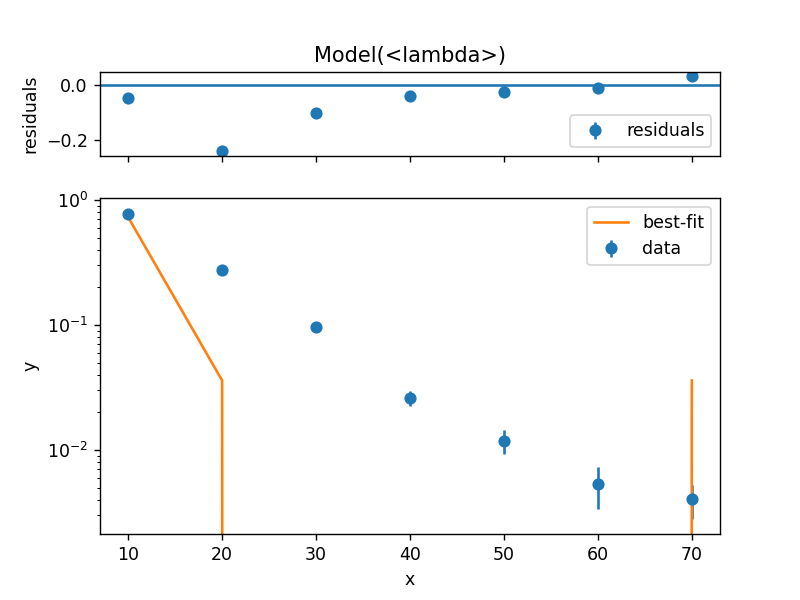

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 7
    # variables        = 2
    chi-square         = 3232.85280
    reduced chi-square = 646.570559
    Akaike info crit   = 46.9464707
    Bayesian info crit = 46.8382910
[[Variables]]
    A:  0.01027792 +/- 0.00263757 (25.66%) (init = 1)
    b: -0.02422046 +/- 0.02628465 (108.52%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, b) = -0.506


In [7]:
sin4 = lambda x,A,b: A/(np.sin(np.pi*x/90)**4)+b
sin4model = Model(sin4)

fig = plt.figure()
res = sin4model.fit(nv(data[0].I[1:]/data[0].I[0]),x=nv(data[i].theta)[1:],A=1,b=1,weights=1/sd(data[i].I/data[0].I[0])[1:])
fig,grid = res.plot(fig=fig)#,show_init=True)
fig.get_axes()[1].set_yscale('log')
print(str.format(res.fit_report()))

<IPython.core.display.Javascript object>


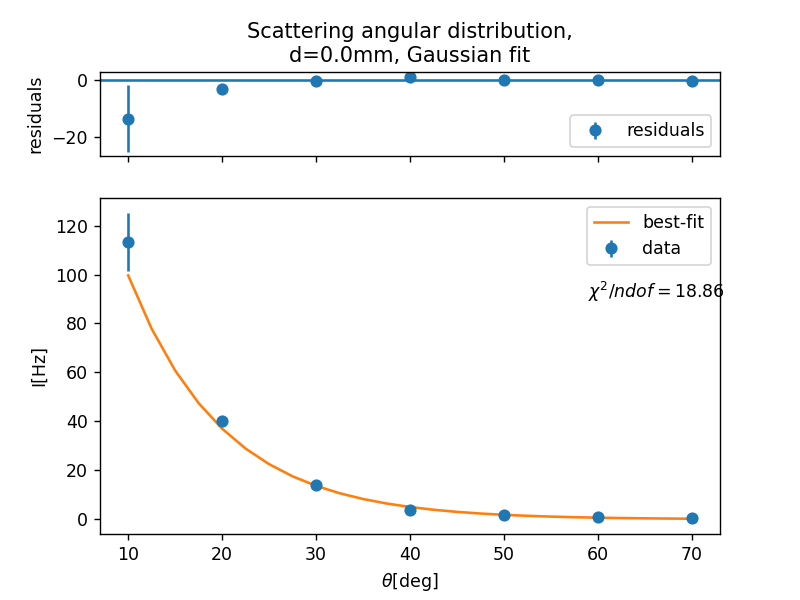

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 8000
    # data points      = 7
    # variables        = 3
    chi-square         = 75.4309811
    reduced chi-square = 18.8577453
    Akaike info crit   = 22.6411555
    Bayesian info crit = 22.4788860
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amplitude:  1.3370e+42 (init = 3378.345)
    center:    -1744.92594 (init = 10)
    sigma:      133.358465 (init = 10)
    fwhm:       314.035180 == '2.3548200*sigma'
    height:     3.9996e+39 == '0.3989423*amplitude/max(1e-15, sigma)'


<IPython.core.display.Javascript object>


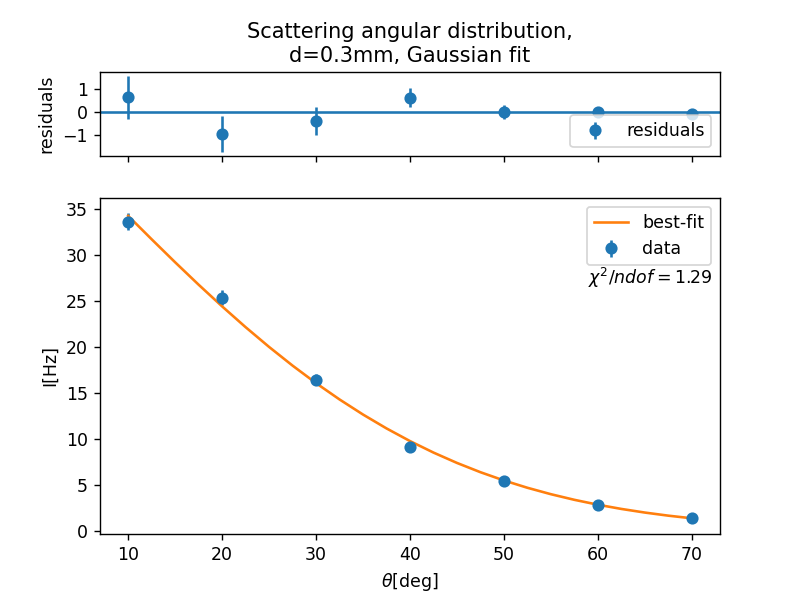

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 7
    # variables        = 3
    chi-square         = 5.15826909
    reduced chi-square = 1.28956727
    Akaike info crit   = 3.86283649
    Bayesian info crit = 3.70056694
[[Variables]]
    amplitude:  5311.00305 +/- 1538.08951 (28.96%) (init = 964.0968)
    center:    -27.4350641 +/- 9.38806404 (34.22%) (init = 10)
    sigma:      35.3869303 +/- 2.70102268 (7.63%) (init = 10)
    fwhm:       83.3298512 +/- 6.36042218 (7.63%) == '2.3548200*sigma'
    height:     59.8747547 +/- 12.9087240 (21.56%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, center) = -0.996
    C(center, sigma)     = -0.989
    C(amplitude, sigma)  =  0.978


<IPython.core.display.Javascript object>


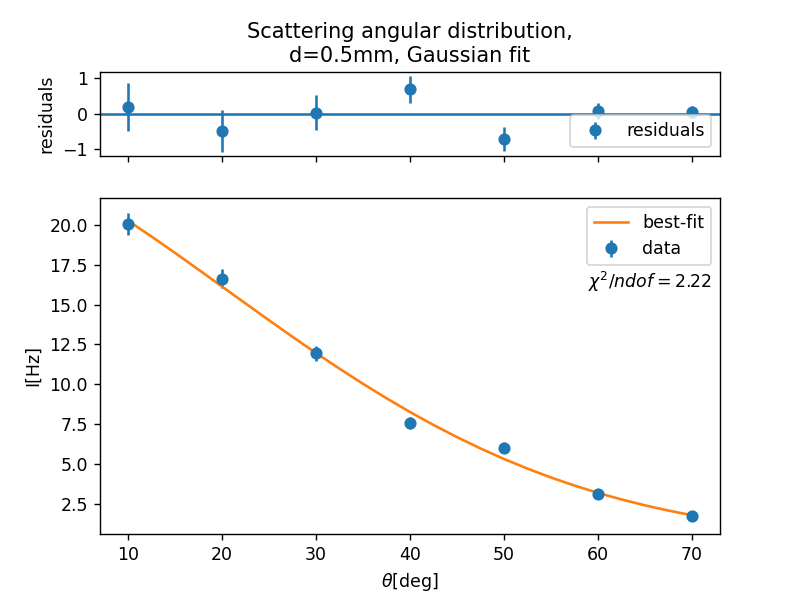

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 7
    # variables        = 3
    chi-square         = 8.86759442
    reduced chi-square = 2.21689860
    Akaike info crit   = 7.65545384
    Bayesian info crit = 7.49318429
[[Variables]]
    amplitude:  2461.83741 +/- 818.536435 (33.25%) (init = 550.5)
    center:    -16.9277502 +/- 12.7218385 (75.15%) (init = 20)
    sigma:      37.4166992 +/- 4.57535425 (12.23%) (init = 10)
    fwhm:       88.1095917 +/- 10.7741357 (12.23%) == '2.3548200*sigma'
    height:     26.2484692 +/- 5.64624416 (21.51%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, center) = -0.996
    C(center, sigma)     = -0.985
    C(amplitude, sigma)  =  0.974


<IPython.core.display.Javascript object>

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 7
    # variables        = 3
    chi-square         = 5.14115934
    reduced chi-square = 1.28528984
    Akaike info crit   = 3.83957920
    Bayesian info crit = 3.67730965
[[Variables]]
    amplitude:  1081.32876 +/- 347.529786 (32.14%) (init = 253)
    center:    -13.2866406 +/- 13.4391868 (101.15%) (init = 20)
    sigma:      39.4213925 +/- 5.36945547 (13.62%) (init = 10)
    fwhm:       92.8302834 +/- 12.6441012 (13.62%) == '2.3548200*sigma'
    height:     10.9429869 +/- 2.08920453 (19.09%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, center) = -0.996
    C(center, sigma)     = -0.984
    C(amplitude, sigma)  =  0.975


In [8]:
gm = GaussianModel()
for i in range(4):
    x = nv(data[i].theta)[1:]
    y=nv(data[i].I)[1:]
    yerr = sd(data[i].I)[1:]
    pars = gm.guess(y, x=x)
#     pars['center'].set(min=-5,max=5)
    fig = plt.figure()
    res = gm.fit(y,pars,x=x,weights=1/yerr)
    res.plot(fig=fig,numpoints=25,xlabel=r'$\theta [\deg]$',ylabel="I[Hz]")
    fig.get_axes()[1].text(59,y[0]*0.8,f"$\chi^2/ndof=${res.redchi:.2f}")
    fig.get_axes()[0].set_title(f"Scattering angular distribution,\nd={ds[i]:.1f}mm, Gaussian fit")
    fig.savefig(f"angle_gauss_{int(ds[i]*10):d}dmm.png")
    print(str.format(res.fit_report()))

In [15]:
def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amplitude, mu, sigma, const)"""
    return amp * np.exp(-(x-cen)**2 / (2*wid**2))
def doubleg(x, amp, cen, wid, wid2):
    return gaussian(x, amp, cen, wid) + gaussian(x, amp, cen, wid2)
gmodel = Model(doubleg)
gmodel.set_param_hint('wid',min=1)
g2model = Model(doubleg)
g2model.set_param_hint('wid',min=1)
g2model.set_param_hint('wid2',min=1)

<IPython.core.display.Javascript object>

[[Model]]
    Model(doubleg)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10000
    # data points      = 8
    # variables        = 4
    chi-square         = 115.862125
    reduced chi-square = 28.9655313
    Akaike info crit   = 29.3836749
    Bayesian info crit = 29.7014411
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amp:   6256.79133 (init = 146.1)
    cen:  -110.787473 (init = 0)
    wid:   35.2903087 (init = 20)
    wid2:  39.6647032 (init = 20)


<IPython.core.display.Javascript object>


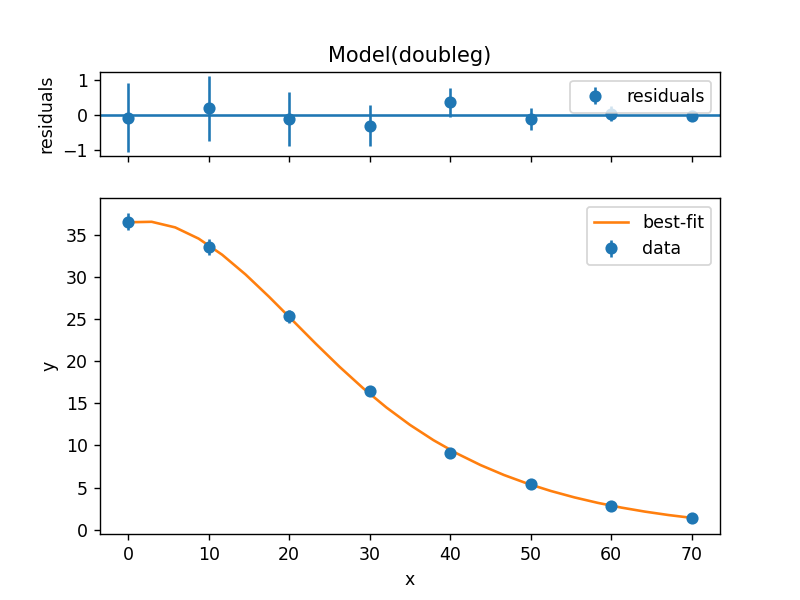

[[Model]]
    Model(doubleg)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 8
    # variables        = 4
    chi-square         = 1.30829250
    reduced chi-square = 0.32707313
    Akaike info crit   = -6.48574950
    Bayesian info crit = -6.16798333
[[Variables]]
    amp:   18.2886288 +/- 0.23377516 (1.28%) (init = 36.53333)
    cen:   1.68412918 +/- 1.15128078 (68.36%) (init = 0)
    wid:   30.1389802 +/- 0.50235890 (1.67%) (init = 20)
    wid2:  16.7025810 +/- 1.10917167 (6.64%) (init = 20)
[[Correlations]] (unreported correlations are < 0.100)
    C(cen, wid2) = -0.914
    C(cen, wid)  = -0.901
    C(wid, wid2) =  0.788
    C(amp, cen)  = -0.398
    C(amp, wid)  =  0.266
    C(amp, wid2) =  0.120


<IPython.core.display.Javascript object>


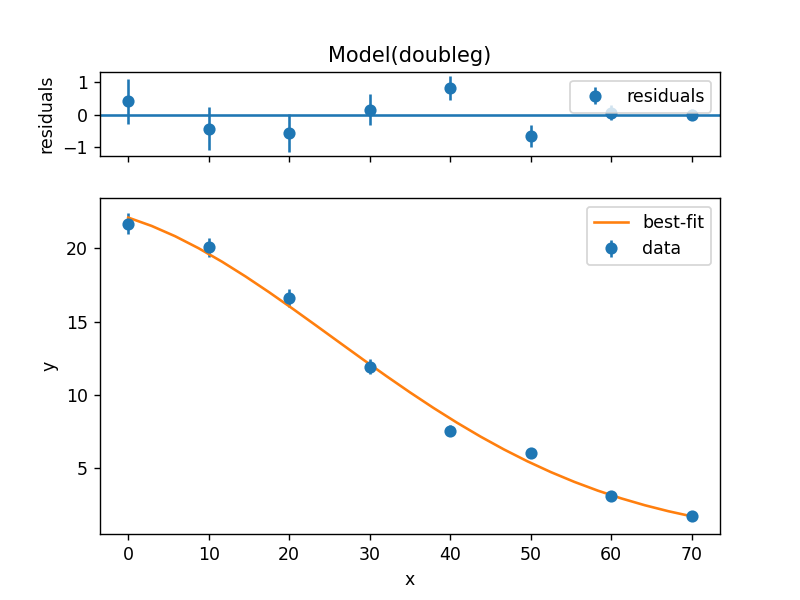

[[Model]]
    Model(doubleg)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 44
    # data points      = 8
    # variables        = 4
    chi-square         = 10.4883333
    reduced chi-square = 2.62208332
    Akaike info crit   = 10.1665759
    Bayesian info crit = 10.4843420
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amp:   22.9333837 (init = 21.7)
    cen:  -9.43845569 (init = 0)
    wid:   34.8511042 (init = 20)
    wid2:  1.19963437 (init = 20)


<IPython.core.display.Javascript object>


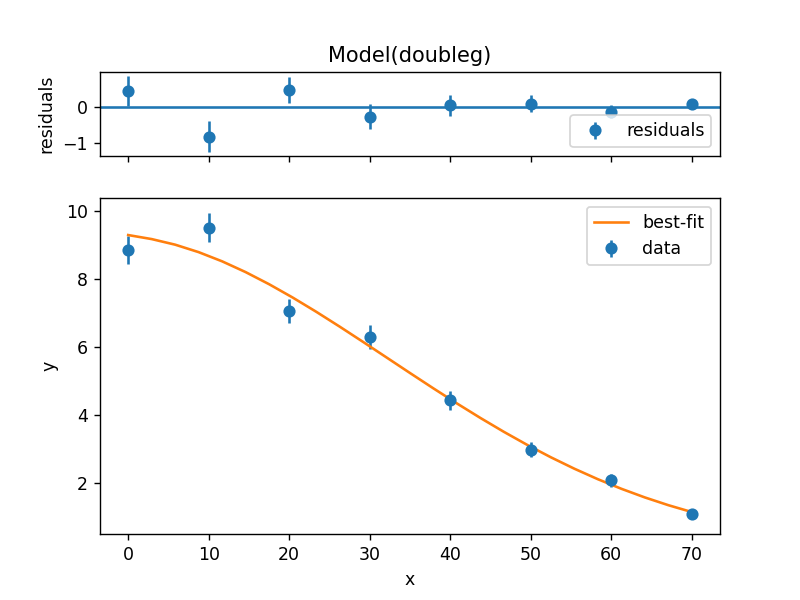

[[Model]]
    Model(doubleg)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 118
    # data points      = 8
    # variables        = 4
    chi-square         = 7.93198294
    reduced chi-square = 1.98299574
    Akaike info crit   = 7.93169215
    Bayesian info crit = 8.24945831
##  Warning: uncertainties could not be estimated:
    wid:   at boundary
[[Variables]]
    amp:   9.33922340 (init = 9.516667)
    cen:  -3.63845946 (init = 0)
    wid:   1.00000003 (init = 20)
    wid2:  35.9378997 (init = 20)


In [16]:
for i in range(4):
#     pars = gm.guess(nv(data[i].I), x=nv(data[i].theta))
#     pars['center'].set(value=0, vary=False, expr='')
    fig = plt.figure()
    res = g2model.fit(nv(data[i].I),x=nv(data[i].theta),amp=nv(data[i].I).max(),cen=0, wid=20,wid2=20,weights=1/sd(data[i].I))
    fig,grid = res.plot(fig=fig,numpoints=25)#,show_init=True)
#     fig.get_axes()[1].set_yscale('log')
    print(str.format(res.fit_report()))